# Assignment Week 1 - Group 5

### Noelani Roy, Yihong Qiu, Cosimo Cambi, Craig Perkins

In [4]:
import pandas as pd
import numpy as np

In [5]:
filename = "../fraudTrain.csv"

fraud_df = pd.read_csv(filename)

# print(fraud_df)

In [3]:
print(fraud_df.shape)

(1296675, 23)


In [4]:
fraud_df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [6]:
fraud_df['txn_datetime'] =  pd.to_datetime(fraud_df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')

fraud_df['date_of_birth'] =  pd.to_datetime(fraud_df['dob'], format='%Y-%m-%d')
fraud_df['year_of_birth'] = fraud_df['date_of_birth'].dt.year
fraud_df['date_of_birth'] = fraud_df['date_of_birth'].dt.date

fraud_df['txn_date'] = fraud_df['txn_datetime'].dt.date

In [8]:
import qgrid

qgrid.show_grid(fraud_df.head(100), grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [8]:
fraud_df.head(1).T.to_markdown()

'|                       | 0                                |\n|:----------------------|:---------------------------------|\n| Unnamed: 0            | 0                                |\n| trans_date_trans_time | 2019-01-01 00:00:18              |\n| cc_num                | 2703186189652095                 |\n| merchant              | fraud_Rippin, Kub and Mann       |\n| category              | misc_net                         |\n| amt                   | 4.97                             |\n| first                 | Jennifer                         |\n| last                  | Banks                            |\n| gender                | F                                |\n| street                | 561 Perry Cove                   |\n| city                  | Moravian Falls                   |\n| state                 | NC                               |\n| zip                   | 28654                            |\n| lat                   | 36.0788                          |\n| long 

In [17]:
fraud_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


<AxesSubplot:>

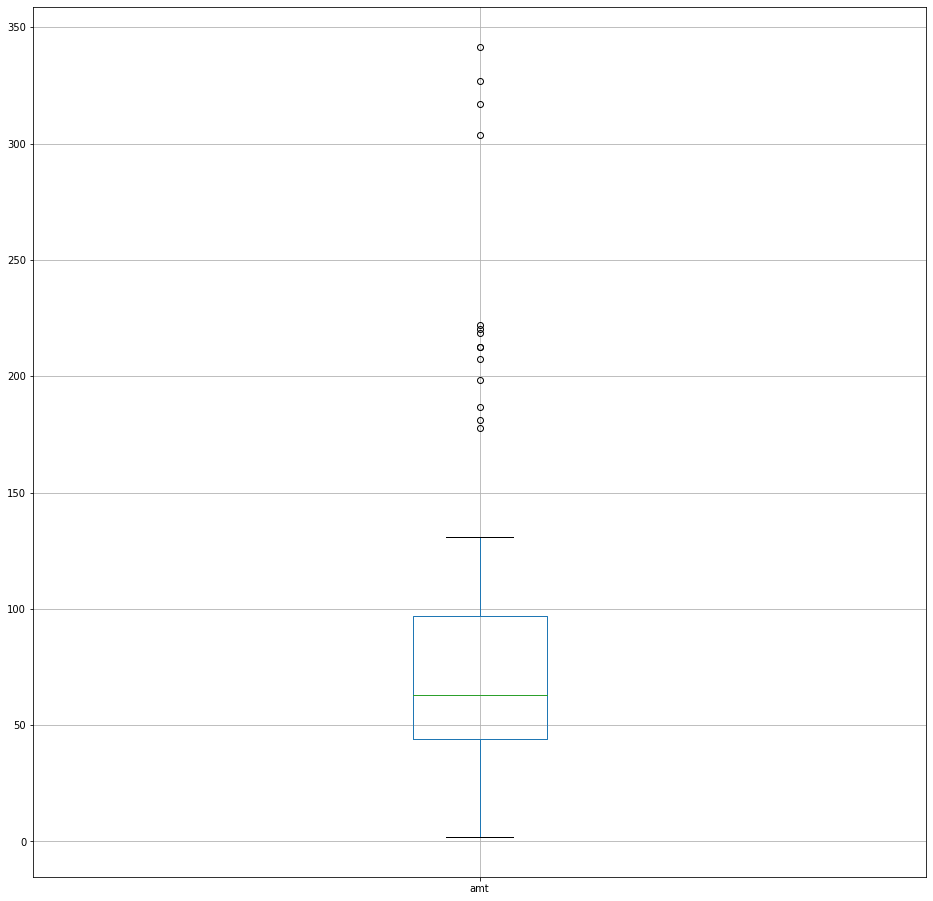

In [9]:
fraud_df.head(100).boxplot(column='amt', figsize=(16, 16))

Text(0, 0.5, 'Volume')

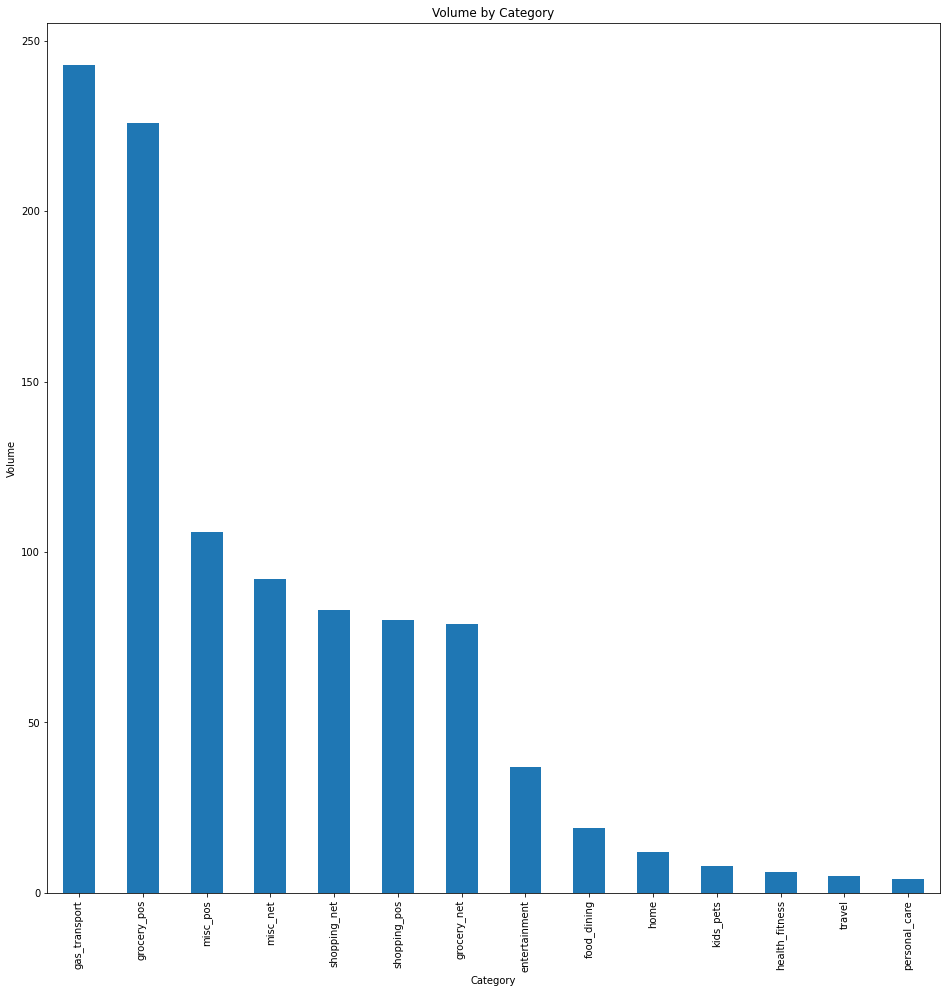

In [20]:
plt = pd.value_counts(fraud_df.head(1000)['category']).plot.bar(figsize=(16, 16), title="Volume by Category")
plt.set_xlabel('Category')
plt.set_ylabel('Volume')

Text(0, 0.5, 'Volume')

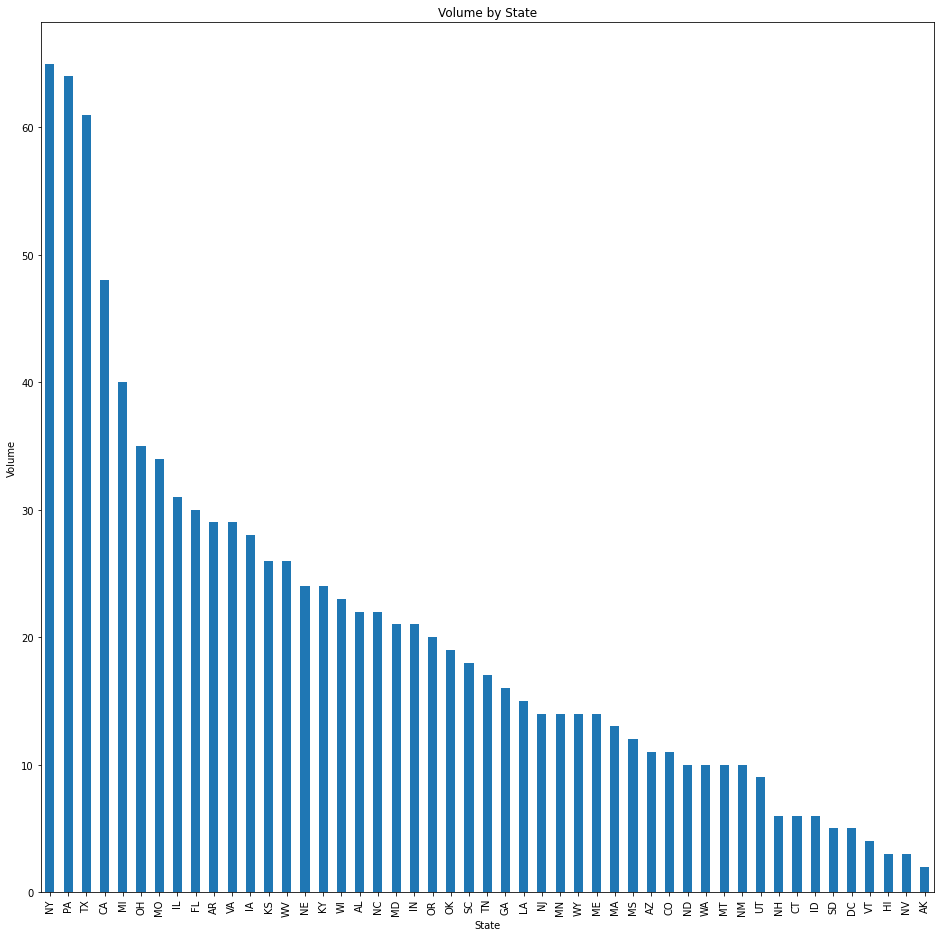

In [21]:
plt = pd.value_counts(fraud_df.head(1000)['state']).plot.bar(figsize=(16, 16), title="Volume by State")
plt.set_xlabel('State')
plt.set_ylabel('Volume')

Text(0, 0.5, 'Volume')

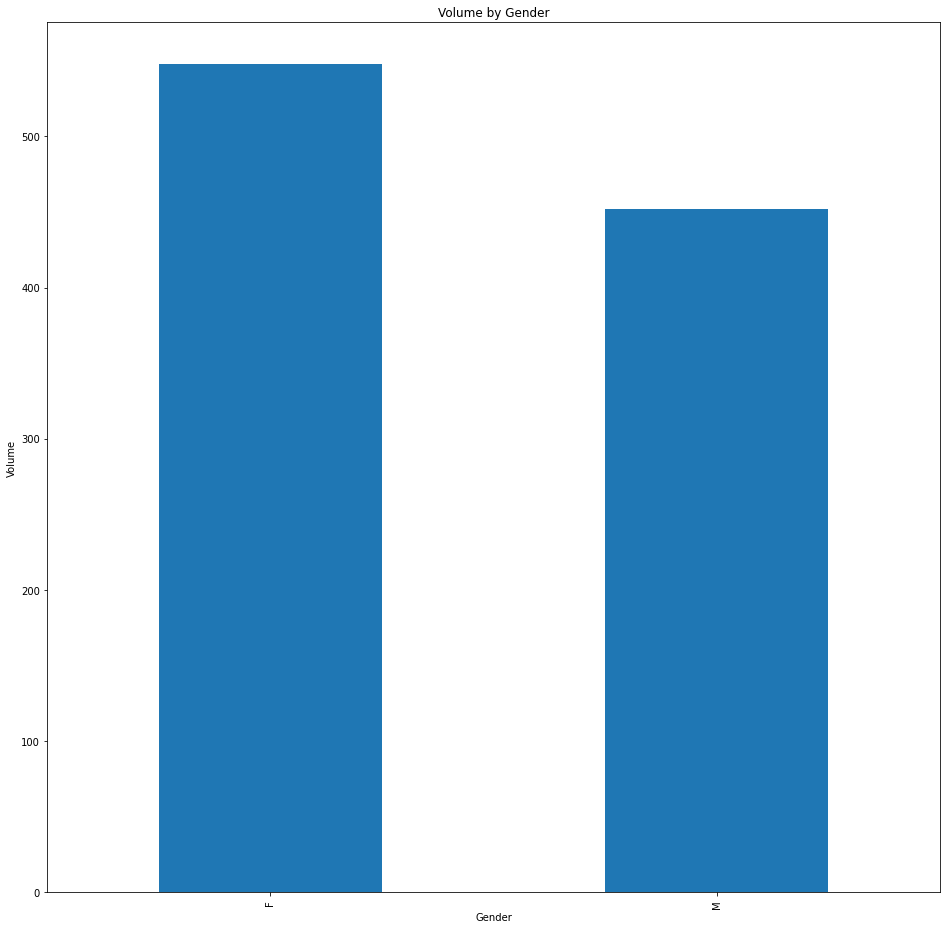

In [22]:
plt = pd.value_counts(fraud_df.head(1000)['gender']).plot.bar(figsize=(16, 16), title="Volume by Gender")
plt.set_xlabel('Gender')
plt.set_ylabel('Volume')

Text(0, 0.5, 'Volume')

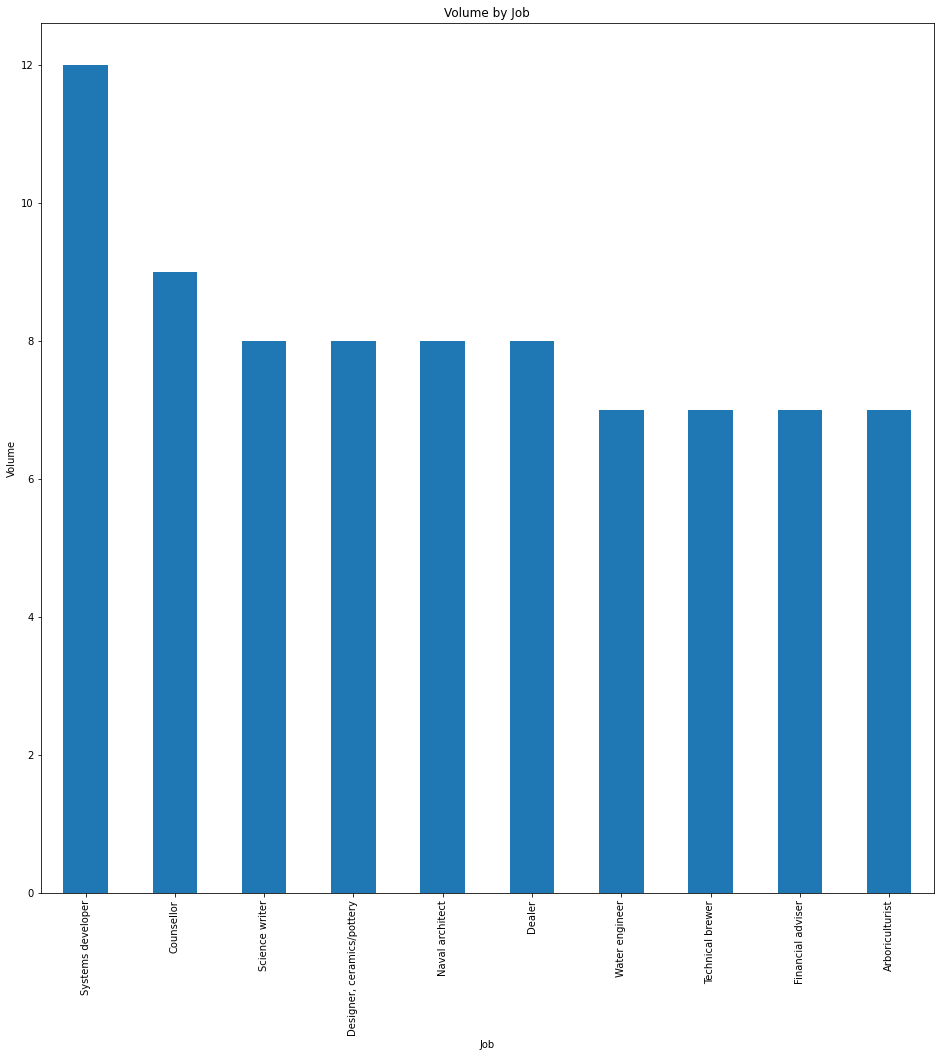

In [24]:
plt = pd.value_counts(fraud_df.head(1000)['job']).nlargest(10).plot.bar(figsize=(16, 16), title="Volume by Job")
plt.set_xlabel('Job')
plt.set_ylabel('Volume')

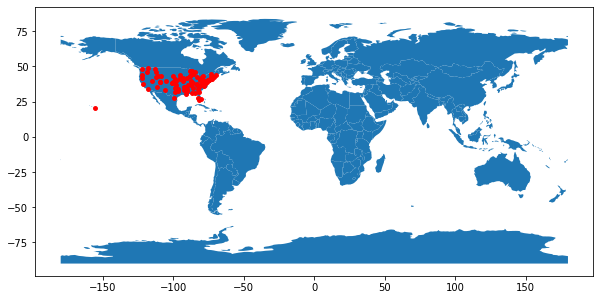

In [5]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(fraud_df.head(100)['long'], fraud_df.head(100)['lat'])]
gdf = GeoDataFrame(fraud_df.head(100), geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

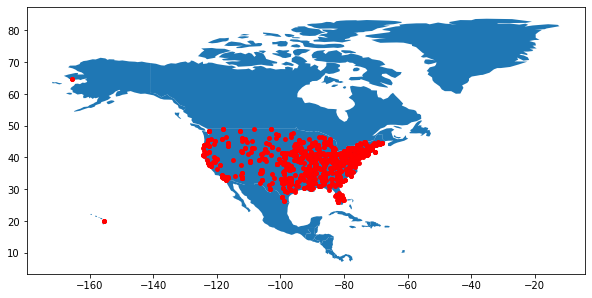

In [11]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(fraud_df.head(1000)['long'], fraud_df.head(1000)['lat'])]
gdf = GeoDataFrame(fraud_df.head(1000), geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'North America']
gdf.plot(ax=ax.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [12]:
txn_count_by_date = fraud_df['txn_date'].value_counts().sort_index().reset_index()
txn_count_by_date.columns = ['txn_date','count']

# qgrid.show_grid(txn_count_by_date.head(100), grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100})

Text(0, 0.5, 'Volume')

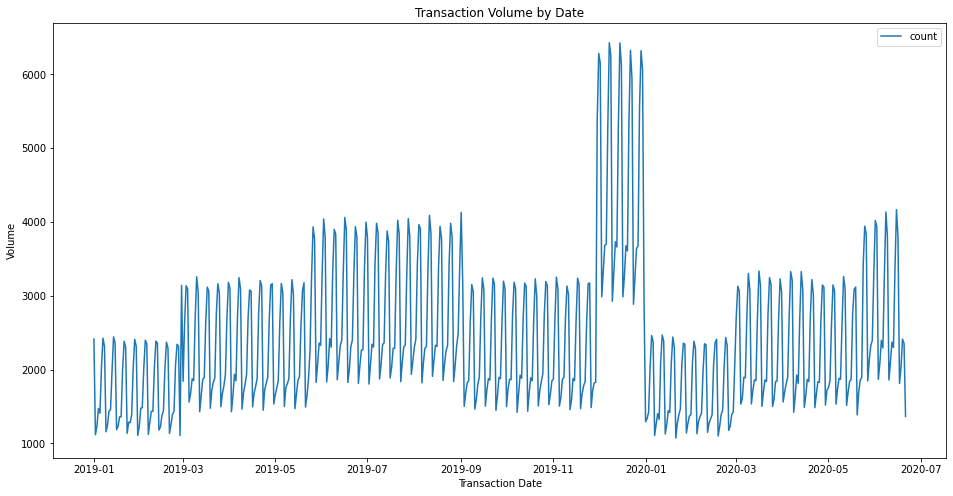

In [11]:
plt = txn_count_by_date.plot.line(x='txn_date', y='count', figsize=(16, 8), title="Transaction Volume by Date")
plt.set_xlabel('Transaction Date')
plt.set_ylabel('Volume')

Text(0, 0.5, 'Count')

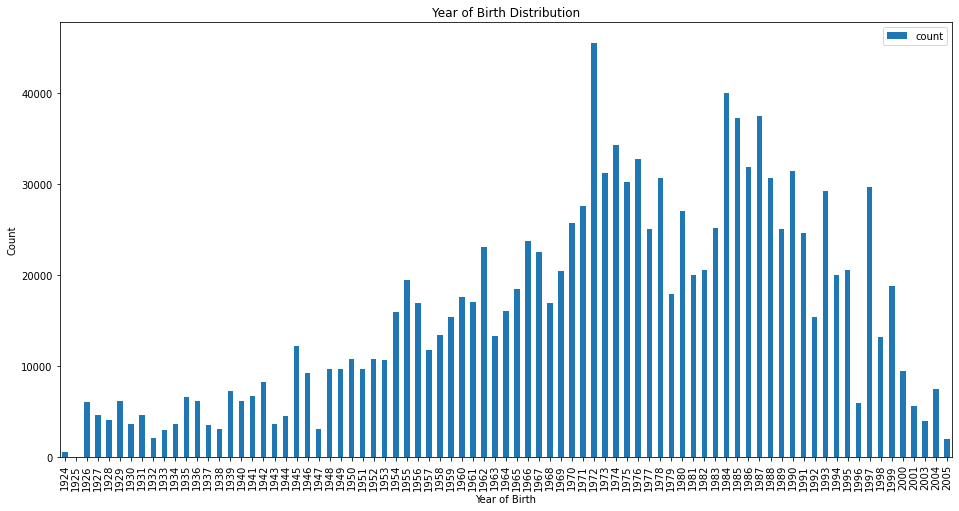

In [13]:
dob_counts = fraud_df['year_of_birth'].value_counts().sort_index().reset_index()
dob_counts.columns = ['year_of_birth','count']

plt = dob_counts.plot.bar(x='year_of_birth', y='count', figsize=(16, 8), title="Year of Birth Distribution")
plt.set_xlabel('Year of Birth')
plt.set_ylabel('Count')

In [11]:
# Number of merchants in the dataset

print(f"Number of merchants: {fraud_df['merchant'].nunique()}")

# Number of cards in the dataset

print(f"Number of cards: {fraud_df['cc_num'].nunique()}")

# Number of cards in the dataset

print(f"Number of unique users: {fraud_df.groupby(['first', 'last', 'gender', 'street', 'city']).ngroups}")


Number of merchants: 693
Number of cards: 983
Number of unique users: 983


Text(0, 0.5, 'Volume')

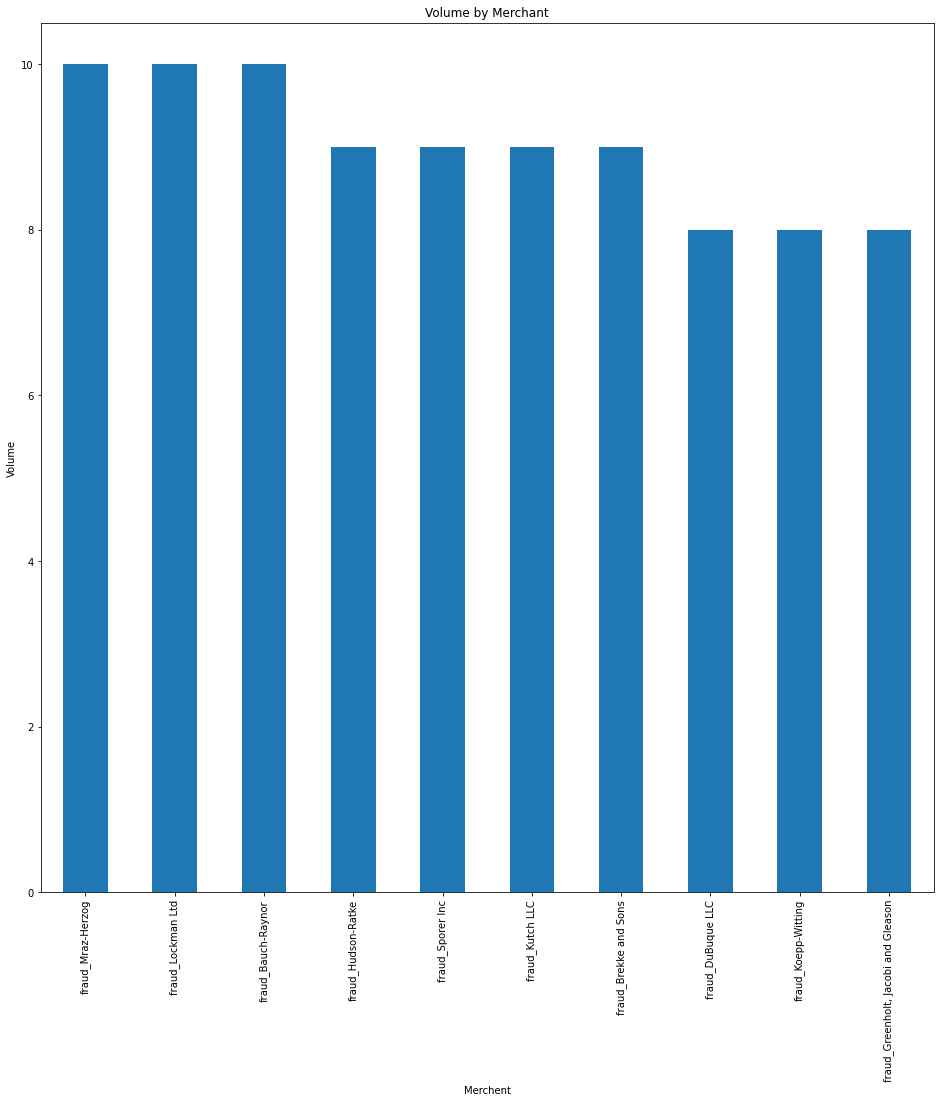

In [12]:
plt = pd.value_counts(fraud_df.head(1000)['merchant']).nlargest(10).plot.bar(figsize=(16, 16), title="Volume by Merchant")
plt.set_xlabel('Merchent')
plt.set_ylabel('Volume')

In [16]:
fraud_df.groupby(['merchant'])['amt'].agg('sum').nlargest(10)

merchant
fraud_Kilback LLC                   391078.15
fraud_Bradtke PLC                   302481.25
fraud_Doyle Ltd                     300971.37
fraud_Hackett-Lueilwitz             300208.14
fraud_Schumm, Bauch and Ondricka    299115.14
fraud_Rau and Sons                  298354.77
fraud_Goodwin-Nitzsche              298083.31
fraud_Pacocha-O'Reilly              297584.38
fraud_Murray-Smitham                296982.73
fraud_Bauch-Raynor                  295721.20
Name: amt, dtype: float64

In [15]:
fraud_df.groupby(['cc_num', 'first', 'last'])['amt'].agg('sum').nlargest(10)

cc_num            first    last    
6011367958204270  Tammy    Ayers       296436.73
4908846471916297  Lauren   Torres      290478.49
6011438889172900  Allison  Allen       284013.50
36722699017270    Jessica  Perez       280008.05
6011893664860915  Erin     Chavez      278325.97
6011109736646996  Rebecca  Erickson    278139.27
3583635130604947  Crystal  Gamble      278042.99
2712209726293386  Jenna    Brooks      277085.65
4836998673805450  Susan    Hardy       275930.63
372509258176510   Kristen  Hanson      275889.68
Name: amt, dtype: float64

In [18]:
fraud_counts = fraud_df['is_fraud'].value_counts().sort_index().reset_index()
fraud_counts.columns = ['is_fraud','count']

# print(fraud_counts)

no_fraud_count = fraud_counts.loc[fraud_counts['is_fraud'] == 0].iloc[0]['count']
fraud_count = fraud_counts.loc[fraud_counts['is_fraud'] == 1].iloc[0]['count']

percent_with_fraud = "{:.2f}".format(((fraud_count / no_fraud_count) * 100))

print(f"No Fraud Count: {no_fraud_count}")
print(f"Fraud Count: {fraud_count}")
print(f"Fraud Percentage: {percent_with_fraud}%")

   is_fraud    count
0         0  1289169
1         1     7506
No Fraud Count: 1289169
Fraud Count: 7506
Fraud Percentage: 0.58%
